In [14]:
#Load the data from the database use4.jsonl 
import json 
import texthero as hero 

from collections import defaultdict
import json
import pandas as pd

with open(r"./user4.jsonl", 'r') as file:
    for line in file:
        data = json.loads(line)
        dataset = dataset._append(data , ignore_index = True)
        

print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   event_id     683 non-null    int64 
 1   prompt       683 non-null    object
 2   history      683 non-null    object
 3   summary      683 non-null    object
 4   his_len      683 non-null    int64 
 5   type         683 non-null    object
 6   instruction  683 non-null    object
 7   output       683 non-null    object
 8   response     663 non-null    object
dtypes: int64(2), object(7)
memory usage: 48.1+ KB
None


In [15]:
#Analyse the dataset 
dataset.head()

,event_id,prompt,history,summary,his_len,type,instruction,output,response
0,786820,Imagine you're in a situation where you need t...,"[User, Hello, I need a ride to metro center, c...",The user requested a ride to Metro Center.\n,10,EmergencyMessage,NCR Test Of the NCR Centers - Non Emergency,Test received,Hello? \n
1,786820,Imagine you're in a situation where you need t...,"[Dispatcher, NCR Test Of the NCR Centers - Non...",The user requested a ride to Metro Center.\n,10,EmergencyMessage,NCR Test Of the NCR Centers - Non Emergency,Test received,Hello? \n
2,786820,Imagine you're in a situation where you need t...,"[User, Test received]",The user requested a ride to Metro Center.\n,10,EmergencyMessage,NCR Test Of the NCR Centers - Non Emergency,Test received,Hello? \n
3,786820,Imagine you're in a situation where you need t...,"[[User, Hello, I need a ride to metro center, ...",The user requested a ride to Metro Center.\n,10,EmergencyMessage,NCR Test Of the NCR Centers - Non Emergency,Test received,Hello? \n
4,788402,Imagine you're in a situation where you need t...,"[[User, Music coming loudly from the park plac...",The user reported a noise complaint from a nei...,10,NoiseDisturbance,Yes!,The one near City Park,It's been going on for hours and it's super lo...


Graph out emotions from a response

In [ ]:
#Retreive only the conversations between the dispatcher and the victim. 
from DataFrame import *
df = DataFrame(texts = dataset["history"][4])


d:\Apps\Python\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
#Perspectives is a BART based pretrained sentiment analysis model. We are intested to find the sentiment of each of the sentence in the conversation and entire conversation as a whole 
df.get_perspectives()

  0%|          | 0/1 [00:00<?, ?it/s]d:\Apps\Python\lib\site-packages\transformers\generation\utils.py:1353: UserWarning: Using `max_length`'s default (142) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
100%|██████████| 1/1 [00:20<00:00, 20.83s/it]


In [6]:
x = df.search()

In [7]:
df.search(speaker = 'User')

,text,speaker,emotion,object,reason
0,"[User, Music coming loudly from the park place...",Speaker,annoyed,the music,it's coming from the park place area or from t...
1,"[Dispatcher, Thank you. We will send an officer.]",Speaker,grateful,dispatcher,they will send an officer
2,"[Dispatcher, Do you mean the University Height...",Speaker,confused,University Heights apartments on campus,they don't know what they're referring to
3,"[User, Yes!]",Speaker,excited,User,they are enjoying the user's content
4,"[User, The one near City Park]",Speaker,neutral,the one near City Park,they are referring to the user's location


In [7]:
for i in range(len(x["emotion"])):
    print(x["emotion"][i])

annoyed
grateful
confused
excited
neutral


In [8]:
emo_dataset = pd.DataFrame({"role" : "User" , "emotions" : "annoyed"} , index = [0])
emo_dataset

,role,emotions
0,User,annoyed


In [9]:
#Get the emotions for each of the conversation between dispatcher and the victim. Generate the emotions for each of the conversation. 
all_roles = ['User', 'Dispatcher']
for item in range(30):
    df = DataFrame(texts = dataset["history"][item])
    df.get_perspectives()
    new_df = df.search() 

    for item in range(len(new_df["text"])):
        if(new_df["text"][item][0] in all_roles):
            new_dic = {"role" : str(new_df["text"][item][0]) , "emotions" : str(new_df["emotion"][item])}
            emo_dataset= emo_dataset._append(new_dic , ignore_index = True)

        else:
            continue 

  0%|          | 0/1 [00:00<?, ?it/s]d:\Apps\Python\lib\site-packages\transformers\generation\utils.py:1353: UserWarning: Using `max_length`'s default (142) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
  0%|          | 0/1 [00:00<?, ?it/s]d:\Apps\Python\lib\site-packages\transformers\generation\utils.py:1353: UserWarning: Using `max_length`'s default (142) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
  0%|          | 0/1 [00:00<?, ?it/s]d:\Apps\Python\lib\site-packages\transformers\generation\utils.py:1353: UserWarning: Using `max_length`'s default (142) to control the generation length. This behaviour is deprecated and will be re

In [10]:
emo_dataset

,role,emotions
0,User,annoyed
1,User,distressed
2,Dispatcher,neutral
3,User,neutral
4,User,annoyed
...,...,...
148,User,neutral
149,User,unsure
150,User,neutral
151,Dispatcher,neutral


<AxesSubplot:xlabel='role', ylabel='emotions'>

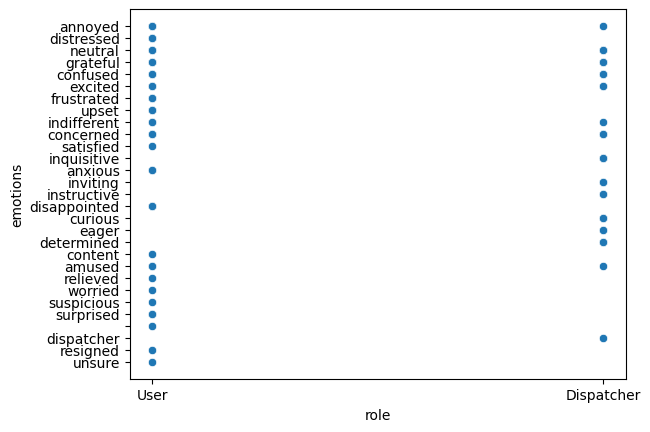

In [60]:
import seaborn as sns 
sns.scatterplot(data = emo_dataset , x = "role" , y = "emotions")

In [ ]:
df['colour'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='role', ylabel='emotions'>

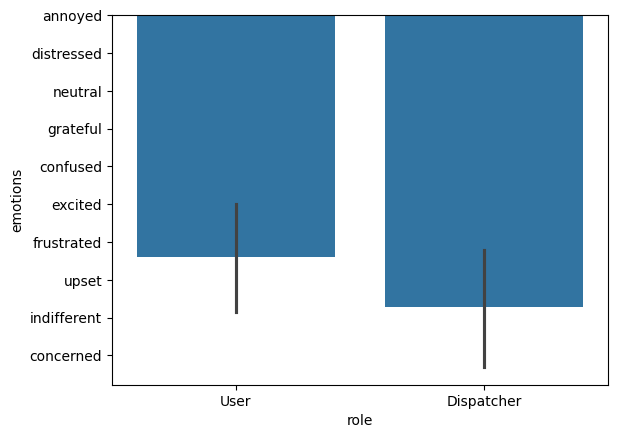

In [13]:
#Plot a bar plot between the emotions between user and dispatcher
import seaborn as sns 
sns.barplot(data = emo_dataset , x = "role" , y = "emotions")

#This graph tells you that the dispacher has history of being idifferent and upset which must be changed when developing a dispatcher simulation bot. 

In [22]:
emo_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   role      153 non-null    object
 1   emotions  153 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


In [24]:
unique_categories = emo_dataset['role'].unique()
unique_emo = emo_dataset['emotions'].unique()

print(unique_emo)
print(unique_categories)

['annoyed' 'distressed' 'neutral' 'grateful' 'confused' 'excited'
 'frustrated' 'upset' 'indifferent' 'concerned' 'satisfied' 'inquisitive'
 'anxious' 'inviting' 'instructive' 'disappointed' 'curious' 'eager'
 'determined' 'content' 'amused' 'relieved' 'worried' 'suspicious'
 'surprised' '' 'dispatcher' 'resigned' 'unsure']
['User' 'Dispatcher']


In [25]:
emo_dataset = emo_dataset[emo_dataset['emotions'] != "dispatcher"]
emo_dataset = emo_dataset[emo_dataset['emotions'] != " "]
print(emo_dataset['emotions'].unique())

['annoyed' 'distressed' 'neutral' 'grateful' 'confused' 'excited'
 'frustrated' 'upset' 'indifferent' 'concerned' 'satisfied' 'inquisitive'
 'anxious' 'inviting' 'instructive' 'disappointed' 'curious' 'eager'
 'determined' 'content' 'amused' 'relieved' 'worried' 'suspicious'
 'surprised' '' 'resigned' 'unsure']


In [27]:
import pandas as pd
import numpy as np


matrix = np.array(emo_dataset)
flattened_matrix = matrix.flatten()
series = pd.Series(flattened_matrix)
category_counts = series.value_counts()

print("Category-wise count:")
print(category_counts)


Category-wise count:
User            95
Dispatcher      57
neutral         44
concerned       13
grateful        12
excited         11
annoyed         10
confused        10
upset            6
frustrated       4
inquisitive      4
distressed       4
disappointed     4
indifferent      3
amused           3
determined       3
curious          3
eager            2
surprised        2
inviting         2
instructive      2
anxious          2
content          1
relieved         1
worried          1
suspicious       1
satisfied        1
                 1
resigned         1
unsure           1
Name: count, dtype: int64


In [67]:
temp_ds = emo_dataset

In [68]:
encoded_temp_ds = pd.get_dummies(temp_ds)
encoded_temp_ds

,role_Dispatcher,role_User,emotions_,emotions_amused,emotions_annoyed,emotions_anxious,emotions_concerned,emotions_confused,emotions_content,emotions_curious,...,emotions_inviting,emotions_neutral,emotions_relieved,emotions_resigned,emotions_satisfied,emotions_surprised,emotions_suspicious,emotions_unsure,emotions_upset,emotions_worried
0,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
149,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
150,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
151,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


<AxesSubplot:>

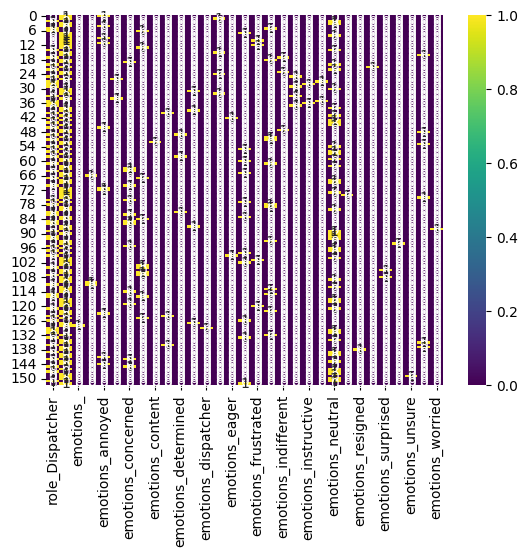

In [70]:

sns.heatmap(data = encoded_temp_ds , annot= True , cmap = 'viridis') 

In [71]:
sns.pairplot(data = encoded_temp_ds)

In [ ]:
sns.countplot(data = emo_dataset)

In [19]:
textts = pd.DataFrame(["The police did not call the police officer."])
df = DataFrame(texts = textts)
df.get_perspectives()
new_df = df.search() 
print(new_df["emotion"][0]) 

  0%|          | 0/1 [00:00<?, ?it/s]d:\Apps\Python\lib\site-packages\transformers\generation\utils.py:1353: UserWarning: Using `max_length`'s default (142) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
100%|██████████| 1/1 [00:04<00:00,  4.83s/it]

disappointed


In [ ]:
analysis = pd.DataFrame({"Start_emotion" : "" , "End_emotion" : "", "Conversation_length" : "" , "event_type" : "EmergencyMessage"} , index = [0])

def cnvert(sent):
    df = DataFrame(texts = pd.DataFrame([sent]))
    df.get_perspectives()
    new_df = df.search() 
    return new_df["emotion"][0]


for index , row in dataset.iterrows():
    if(len(row["history"]) == 1):
        analysis = analysis._append({"Start_emotion" : cnvert(row["history"][1]), "End_emotion" : cnvert(row["history"][1]), "Conversation_length" : len(row["history"]), "event_type" : row["type"]} , ignore_index = True)
    else:
        analysis = analysis._append({"Start_emotion" : cnvert(row["history"][0][1]), "End_emotion" : cnvert(row["history"][-1][1]), "Conversation_length" : len(row["history"]), "event_type" : row["type"]} , ignore_index = True)



In [ ]:
speaker = 'User'

In [24]:
analysis = analysis.drop(0) 
analysis

,Start_emotion,End_emotion,Conversation_length,event_type
1,neutral,neutral,2,EmergencyMessage
2,neutral,neutral,2,EmergencyMessage
3,neutral,neutral,2,EmergencyMessage
4,distressed,neutral,3,EmergencyMessage
5,annoyed,neutral,5,NoiseDisturbance
...,...,...,...,...
426,worried,neutral,8,SuspiciousActivity
427,worried,neutral,15,SuspiciousActivity
428,curious,neutral,3,EmergencyMessage
429,curious,grateful,10,EmergencyMessage


In [25]:
analysis.to_csv("./start-end-analysis.csv" , index=False)

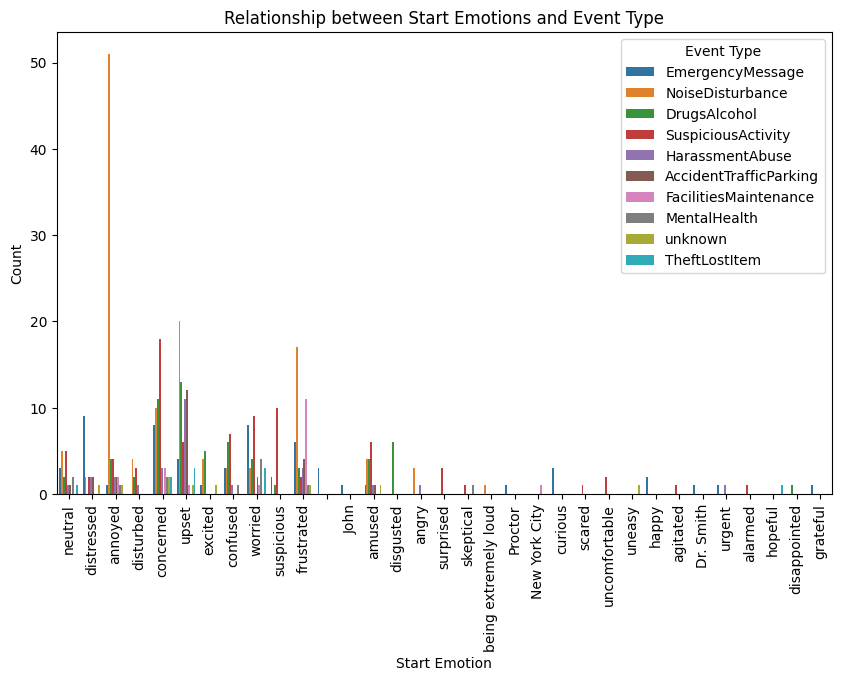

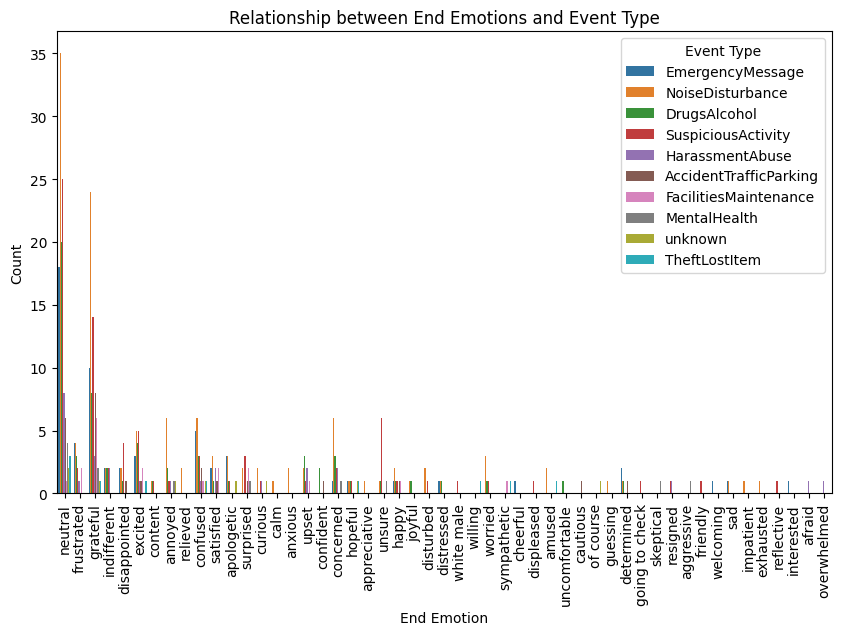

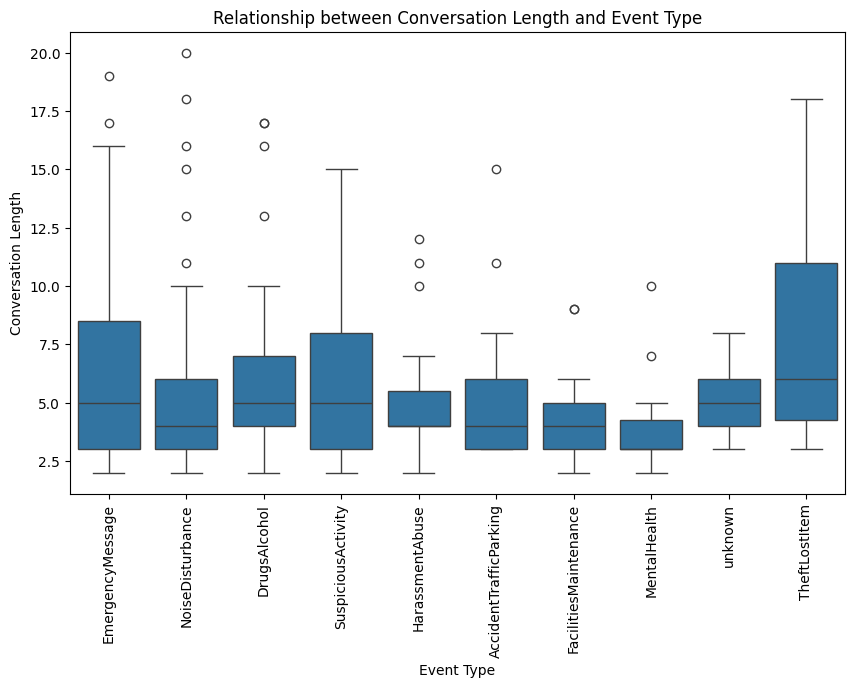

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='Start_emotion', hue='event_type', data=analysis)
plt.xticks(rotation=90)
plt.title('Relationship between Start Emotions and Event Type')
plt.xlabel('Start Emotion')
plt.ylabel('Count')
plt.legend(title='Event Type')
plt.show()

# Plot relationship between end emotions and event type
plt.figure(figsize=(10, 6))
sns.countplot(x='End_emotion', hue='event_type', data=analysis)
plt.xticks(rotation=90)
plt.title('Relationship between End Emotions and Event Type')
plt.xlabel('End Emotion')
plt.ylabel('Count')
plt.legend(title='Event Type')
plt.show()

# Plot relationship between conversation length and event type
plt.figure(figsize=(10, 6))
sns.boxplot(x='event_type', y='Conversation_length', data=analysis)
plt.title('Relationship between Conversation Length and Event Type')
plt.xticks(rotation=90)
plt.xlabel('Event Type')
plt.ylabel('Conversation Length')
plt.show()

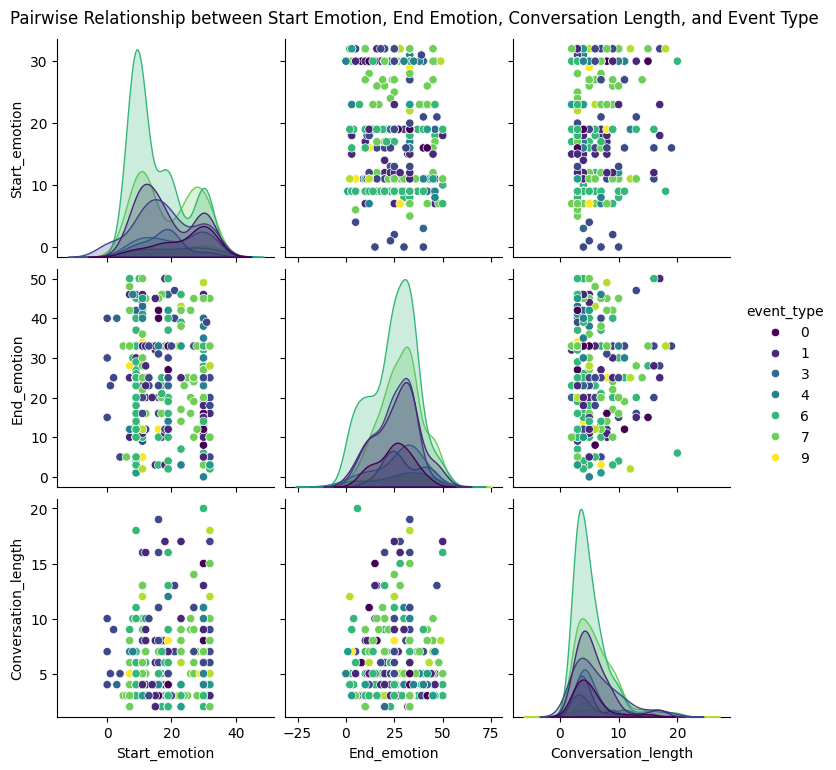

In [34]:
df = pd.DataFrame(analysis)

# Convert categorical variables to numerical for visualization
df['Start_emotion'] = df['Start_emotion'].astype('category').cat.codes
df['End_emotion'] = df['End_emotion'].astype('category').cat.codes
df['event_type'] = df['event_type'].astype('category').cat.codes

# Create pair plot
sns.pairplot(df, hue='event_type', palette='viridis')
plt.suptitle('Pairwise Relationship between Start Emotion, End Emotion, Conversation Length, and Event Type', y=1.02)
plt.show()


In [49]:
from openai import OpenAI
client = OpenAI()

completion = client.chat.completions.create(
  model="gpt-4-turbo-preview",
  messages=[
    {"role": "system", "content": "You are an assistant that provides relationships and insight on a jsondata given to you."},
    {"role": "user", "content": json_string},
    {"role": "user", "content": "Provide me with insights on the data provided. Also tell me the relationship between start emotions, end emotions, conversation length, and event type. Provide me with graphical representations of the relationships between start emotions, end emotions, conversation length, and event type."},
    {"role" : "user", "content" : "Also suggest different ways in which we can reduce the value of conversation length while bringing about positive emotions for end emotions. Also suggest some research papers and techniques for the same. "}
  ]
)

print(completion.choices[0].message)

ChatCompletionMessage(content='Given the complexity and volume of the data provided, a detailed statistical analysis and programmatic data visualization would be best executed using specialized software like Python\'s pandas and matplotlib libraries, or R with ggplot2. However, I can still offer insights based on general observations and prevalent data analysis methodologies.\n\n### Insights from Data:\n\n1. **Common Start and End Emotions**: There are transitions from negative starting emotions (e.g., distressed, upset) to neutral or positive end emotions (e.g., neutral, grateful), which may suggest successful intervention strategies in various events.\n\n2. **Event Type Distribution**: The dataset includes different event types such as EmergencyMessage, NoiseDisturbance, DrugsAlcohol, and SuspiciousActivity. Each event type tends to have common starting and ending emotional states indicating the nature of these events on individuals\' emotions.\n\n3. **Conversation Length**: It varie

In [44]:
df = pd.read_csv("./start-end-analysis.csv")

# Convert the DataFrame to a JSON string
json_string = df.to_json(orient='records')

# Print or use the JSON string as needed
print(json_string)

[{"Start_emotion":"neutral","End_emotion":"neutral","Conversation_length":2,"event_type":"EmergencyMessage"},{"Start_emotion":"neutral","End_emotion":"neutral","Conversation_length":2,"event_type":"EmergencyMessage"},{"Start_emotion":"neutral","End_emotion":"neutral","Conversation_length":2,"event_type":"EmergencyMessage"},{"Start_emotion":"distressed","End_emotion":"neutral","Conversation_length":3,"event_type":"EmergencyMessage"},{"Start_emotion":"annoyed","End_emotion":"neutral","Conversation_length":5,"event_type":"NoiseDisturbance"},{"Start_emotion":"disturbed","End_emotion":"frustrated","Conversation_length":2,"event_type":"NoiseDisturbance"},{"Start_emotion":"disturbed","End_emotion":"grateful","Conversation_length":8,"event_type":"NoiseDisturbance"},{"Start_emotion":"concerned","End_emotion":"indifferent","Conversation_length":5,"event_type":"NoiseDisturbance"},{"Start_emotion":"distressed","End_emotion":"disappointed","Conversation_length":8,"event_type":"EmergencyMessage"},{"

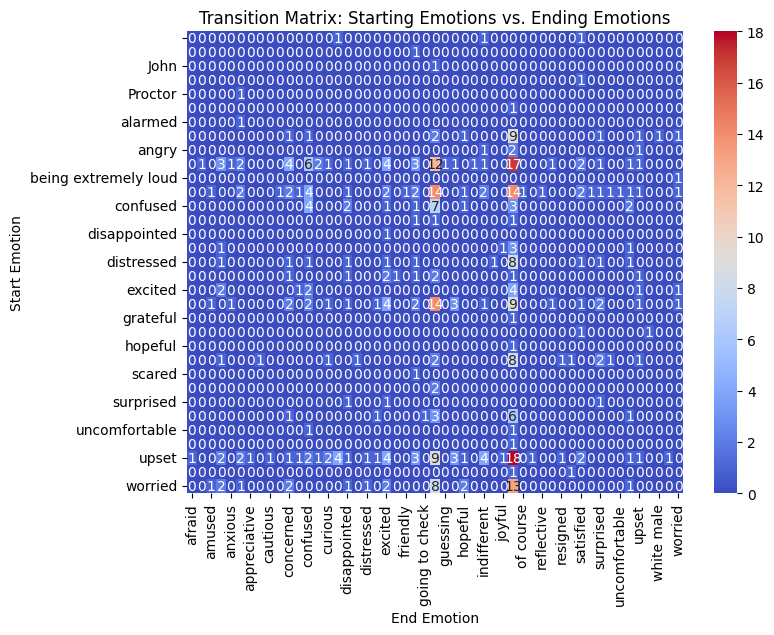

In [48]:

df = analysis
transition_counts = pd.crosstab(df['Start_emotion'], df['End_emotion'])

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(transition_counts, annot=True, cmap='coolwarm', fmt='d')
plt.title('Transition Matrix: Starting Emotions vs. Ending Emotions')
plt.xlabel('End Emotion')
plt.ylabel('Start Emotion')
plt.show()

In [46]:
analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 1 to 430
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Start_emotion        430 non-null    object
 1   End_emotion          430 non-null    object
 2   Conversation_length  430 non-null    object
 3   event_type           430 non-null    object
dtypes: object(4)
memory usage: 13.6+ KB
